In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = r"./sample_data/Cleaned_dataset.csv"
df = pd.read_csv(file)

df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78549 entries, 0 to 78548
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_of_journey    78549 non-null  datetime64[ns]
 1   Journey_day        78549 non-null  object        
 2   Airline            78549 non-null  object        
 3   Flight_code        78549 non-null  object        
 4   Class              78549 non-null  object        
 5   Source             78549 non-null  object        
 6   Departure          78549 non-null  object        
 7   Total_stops        78549 non-null  object        
 8   Arrival            78548 non-null  object        
 9   Destination        78548 non-null  object        
 10  Duration_in_hours  78548 non-null  float64       
 11  Days_left          78548 non-null  float64       
 12  Fare               78548 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 7.8

In [4]:
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1.0,5335.0
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1.0,5899.0
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1.0,5801.0
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1.0,5794.0
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1.0,5955.0


In [5]:
df = df.dropna()
df.drop_duplicates( keep='first', inplace=True)
df = df.reset_index(drop = True)
df.shape

(77961, 13)

In [6]:
df.describe()

,Date_of_journey,Duration_in_hours,Days_left,Fare
count,77961,77961.000000,77961.000000,77961.000000
mean,2023-02-09 00:56:02.419671296,11.257487,25.038917,20690.730699
min,2023-01-16 00:00:00,1.416700,1.000000,2590.000000
25%,2023-01-28 00:00:00,5.583300,13.000000,8264.000000
50%,2023-02-09 00:00:00,10.000000,25.000000,11948.000000
75%,2023-02-21 00:00:00,15.166700,37.000000,30249.000000
max,2023-03-06 00:00:00,42.916700,50.000000,123260.000000
std,NaN,7.333269,14.337733,18385.545529


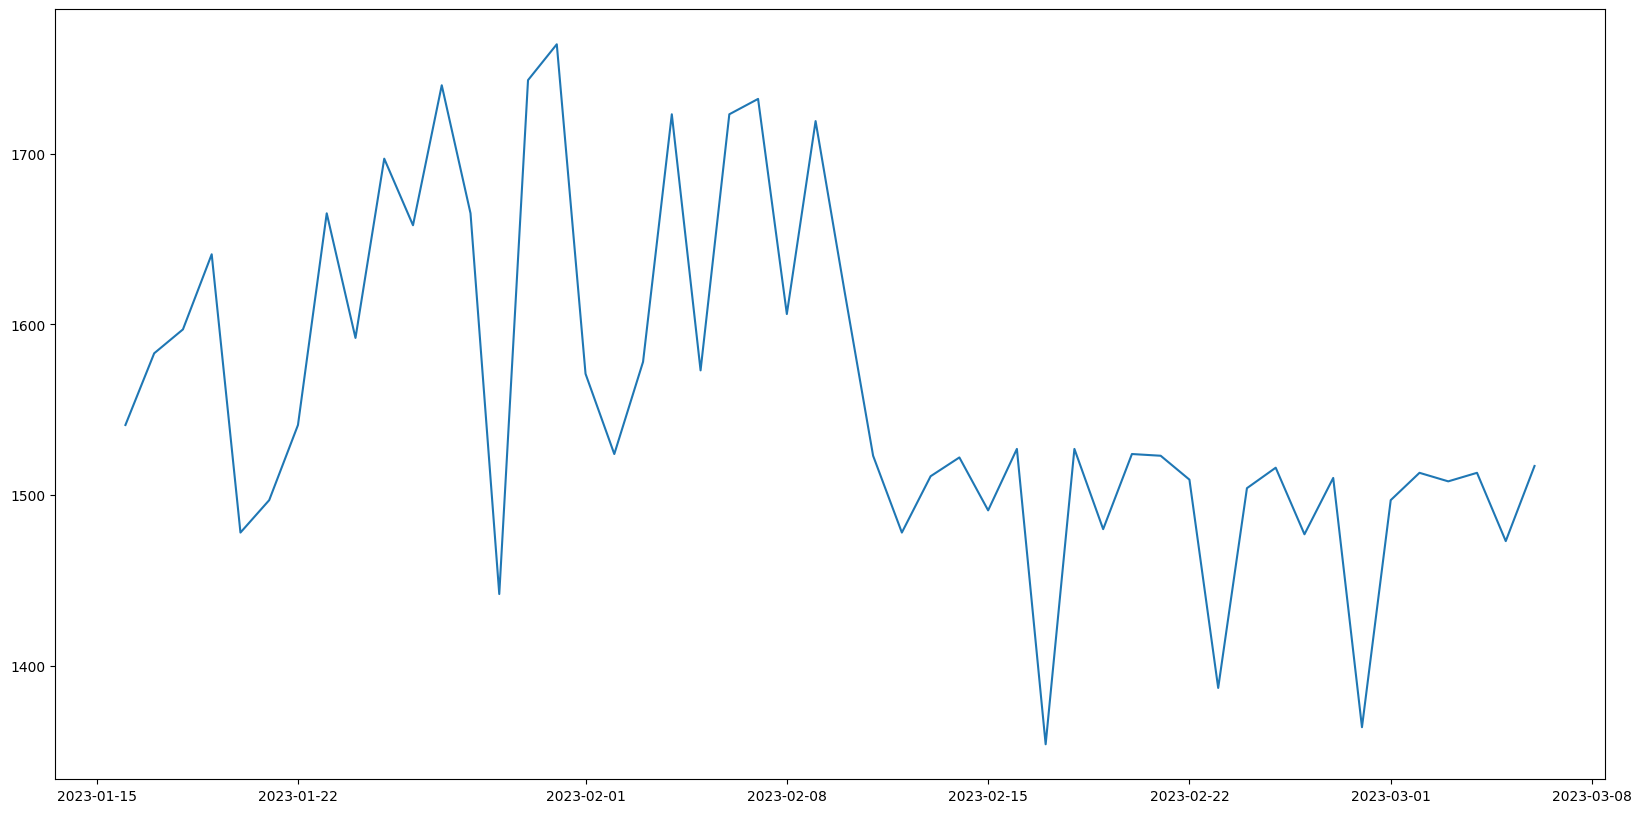

In [7]:
flights_per_day = df.groupby('Date_of_journey').size().reset_index(name='Total_Flights')
plt.figure (figsize=(20,10))
plt.plot(flights_per_day['Date_of_journey'], flights_per_day['Total_Flights'])

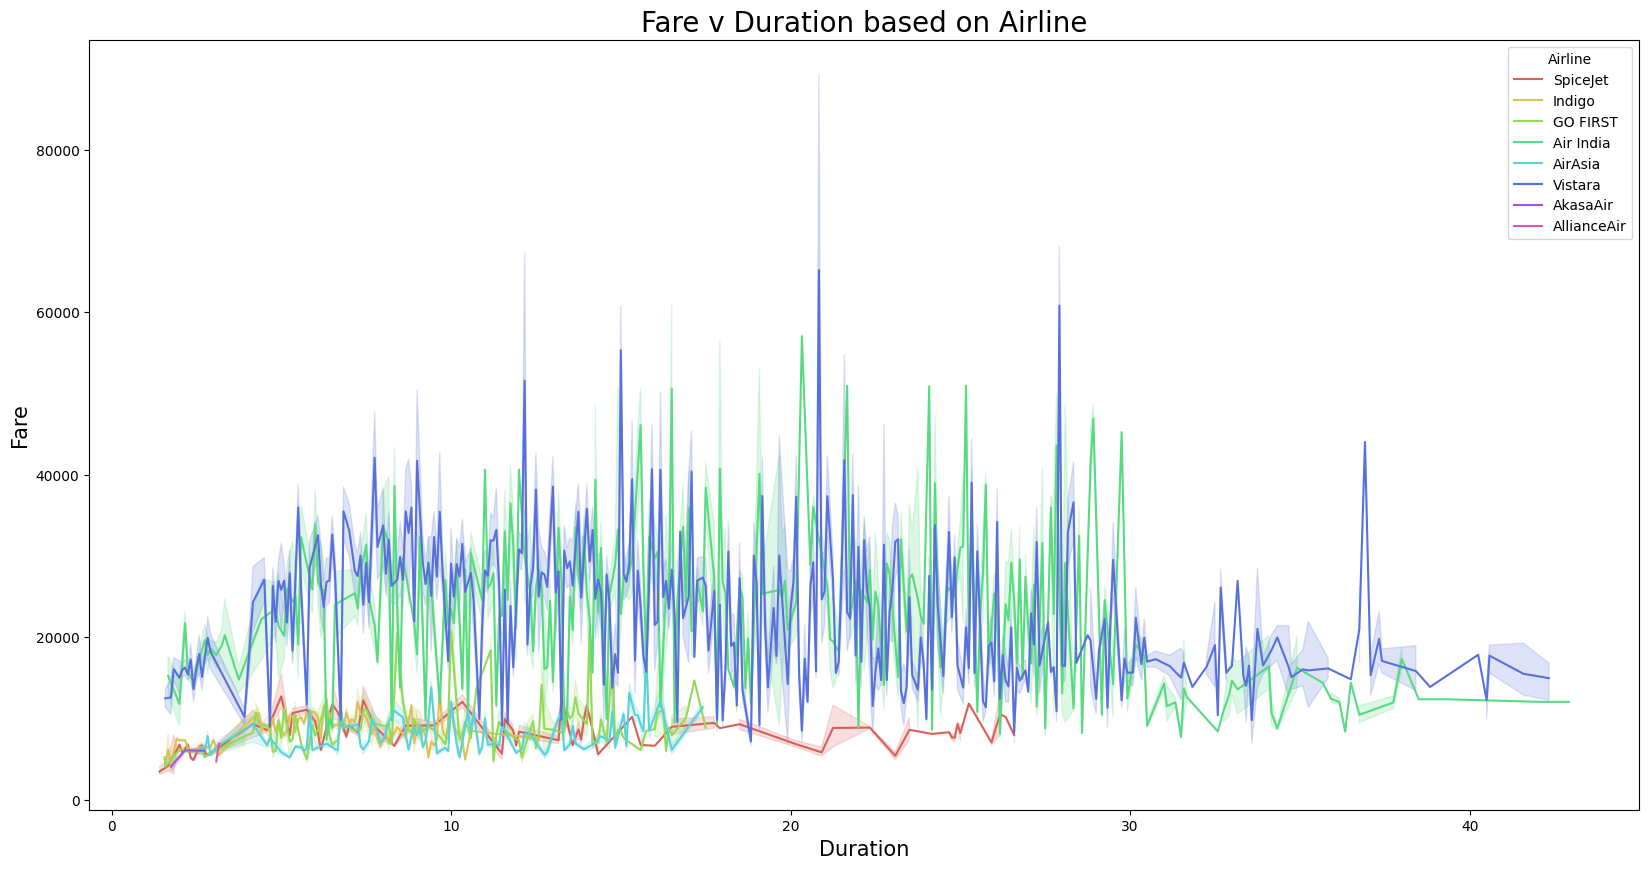

In [8]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = df,x = 'Duration_in_hours',y = 'Fare',hue = 'Airline',palette = 'hls')
plt.title('Fare v Duration based on Airline',fontsize = 20)
plt.xlabel('Duration',fontsize = 15)
plt.ylabel('Fare',fontsize = 15)
plt.show()

In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df['Journey_day'] = pd.Categorical(df['Journey_day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
ohencode = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
encode = LabelEncoder()

In [10]:
# One Hot encoding the rest of the categorical data
for col in ["Journey_day", "Airline","Class", "Source", "Departure", "Total_stops", "Arrival", "Destination"]:
    ohetransform = ohencode.fit_transform(df[[col]])
    df = pd.concat([df, ohetransform], axis=1).drop(columns=[col])

# Label Encoding Flight_code
df.Flight_code = encode.fit_transform(df.Flight_code)

In [11]:
df.head()

,Date_of_journey,Flight_code,Duration_in_hours,Days_left,Fare,Journey_day_Friday,Journey_day_Monday,Journey_day_Saturday,Journey_day_Sunday,Journey_day_Thursday,...,Arrival_12 PM - 6 PM,Arrival_6 AM - 12 PM,Arrival_After 6 PM,Arrival_Before 6 AM,Destination_Ahmedabad,Destination_Bangalore,Destination_Chennai,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,2023-01-16,291,2.0833,1.0,5335.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2023-01-16,77,2.3333,1.0,5899.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2023-01-16,235,2.1667,1.0,5801.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2023-01-16,302,2.0833,1.0,5794.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2023-01-16,192,2.1667,1.0,5955.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: >

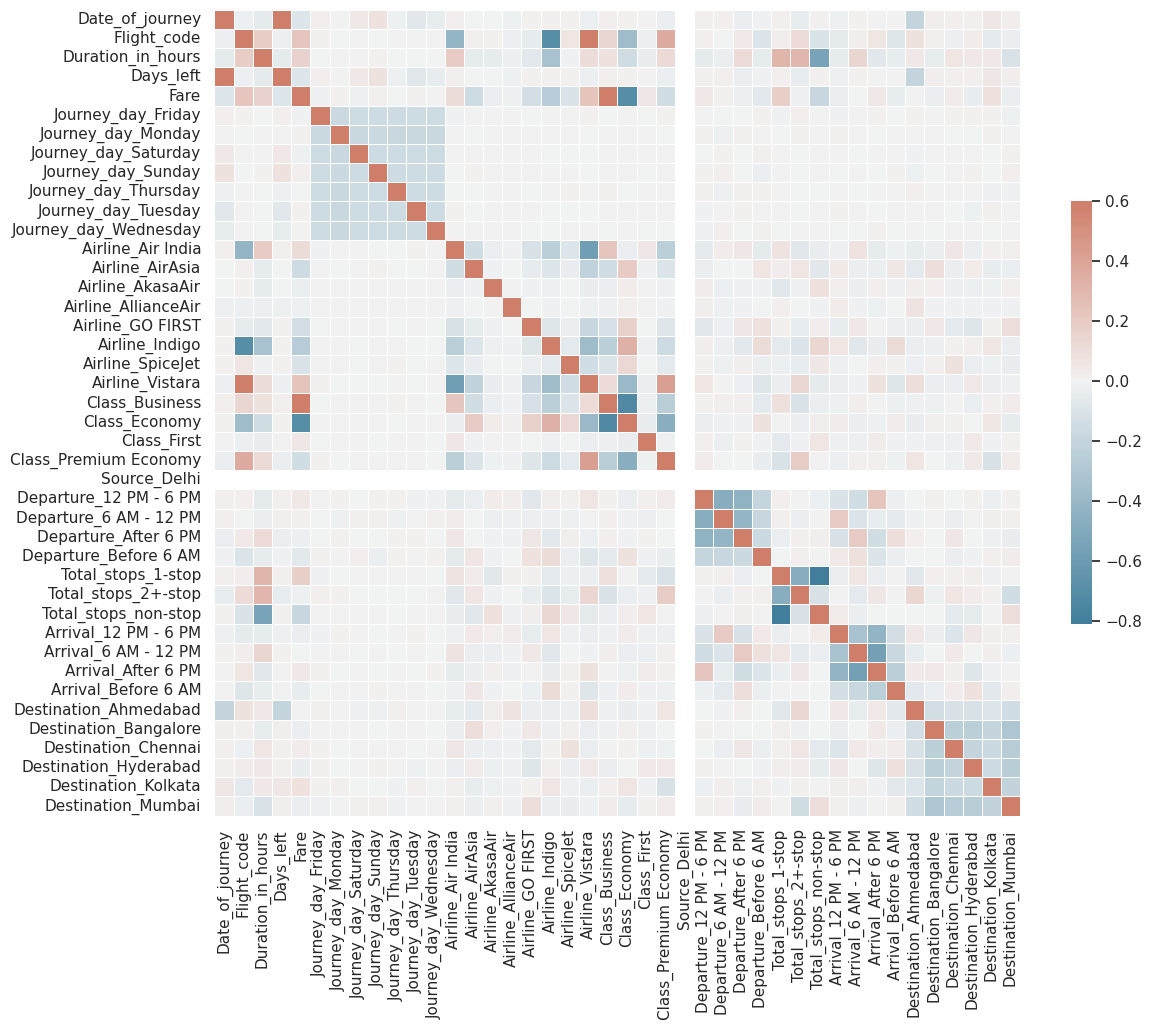

In [13]:
df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])
corr_matrix = df.corr()
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix,cmap=cmap,fmt='.3f', vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
df.to_csv('df_fixed.csv', index=False)

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

models_dict = {}

df.sort_values(by='Date_of_journey')

df['year'] = df['Date_of_journey'].dt.year
df['month'] = df['Date_of_journey'].dt.month
df['day'] = df['Date_of_journey'].dt.day


X=df.drop(['Fare','Date_of_journey'],axis=1)
y=df['Fare']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X['Duration_in_hours'] = scaler.fit_transform(X[['Duration_in_hours']])
X['Days_left'] = scaler.fit_transform(X[['Days_left']])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

X_train

,Flight_code,Duration_in_hours,Days_left,Journey_day_Friday,Journey_day_Monday,Journey_day_Saturday,Journey_day_Sunday,Journey_day_Thursday,Journey_day_Tuesday,Journey_day_Wednesday,...,Arrival_Before 6 AM,Destination_Ahmedabad,Destination_Bangalore,Destination_Chennai,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,year,month,day
30769,353,-0.376027,0.625004,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2023,2,18
21479,214,-1.148770,-1.188405,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2023,1,23
67527,188,2.112647,0.276272,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2023,2,13
24176,356,2.328555,-0.700179,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2023,1,30
42363,145,0.430808,-0.211954,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2023,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,334,-0.546484,-0.560686,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2023,2,1
54886,320,-1.216953,0.276272,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2023,2,13
76820,354,0.385344,-0.351447,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2023,2,4
860,195,0.555801,-1.537137,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2023,1,18


In [16]:
model = DecisionTreeRegressor(criterion='squared_error', random_state=42)

model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [17]:
score = r2_score(y_preds, y_test)
print (score)

0.9390916789517935


In [18]:
def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def RMSE (y_test, y_pred):
    return np.sqrt(np.mean((y_test - y_pred) ** 2))

print (MAPE (y_test, y_preds))
RMSE (y_test, y_preds)
models_dict['DecisionTreeRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

8.792496707219808


In [19]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

<Figure size 2000x800 with 0 Axes>

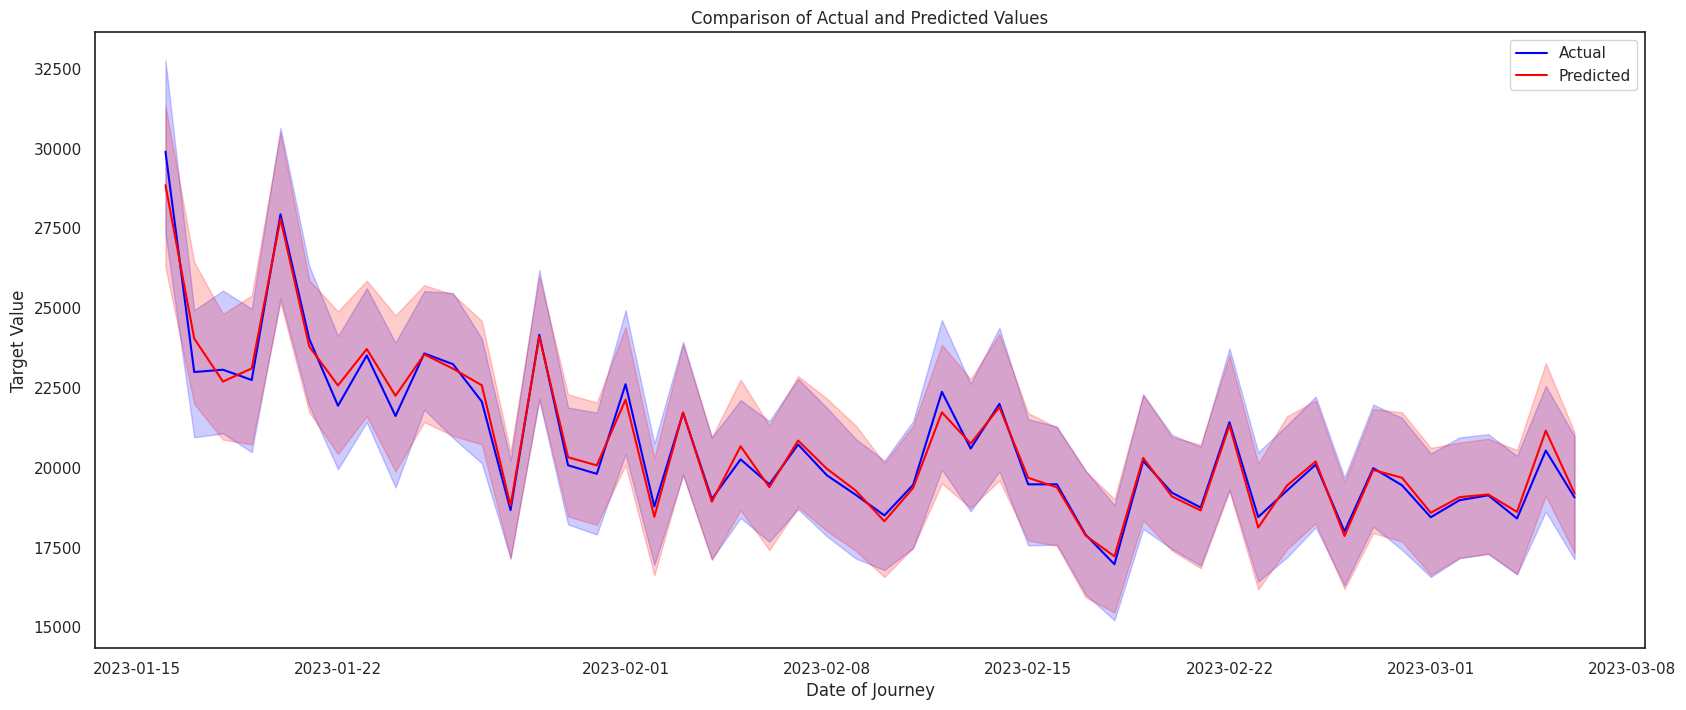

In [20]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

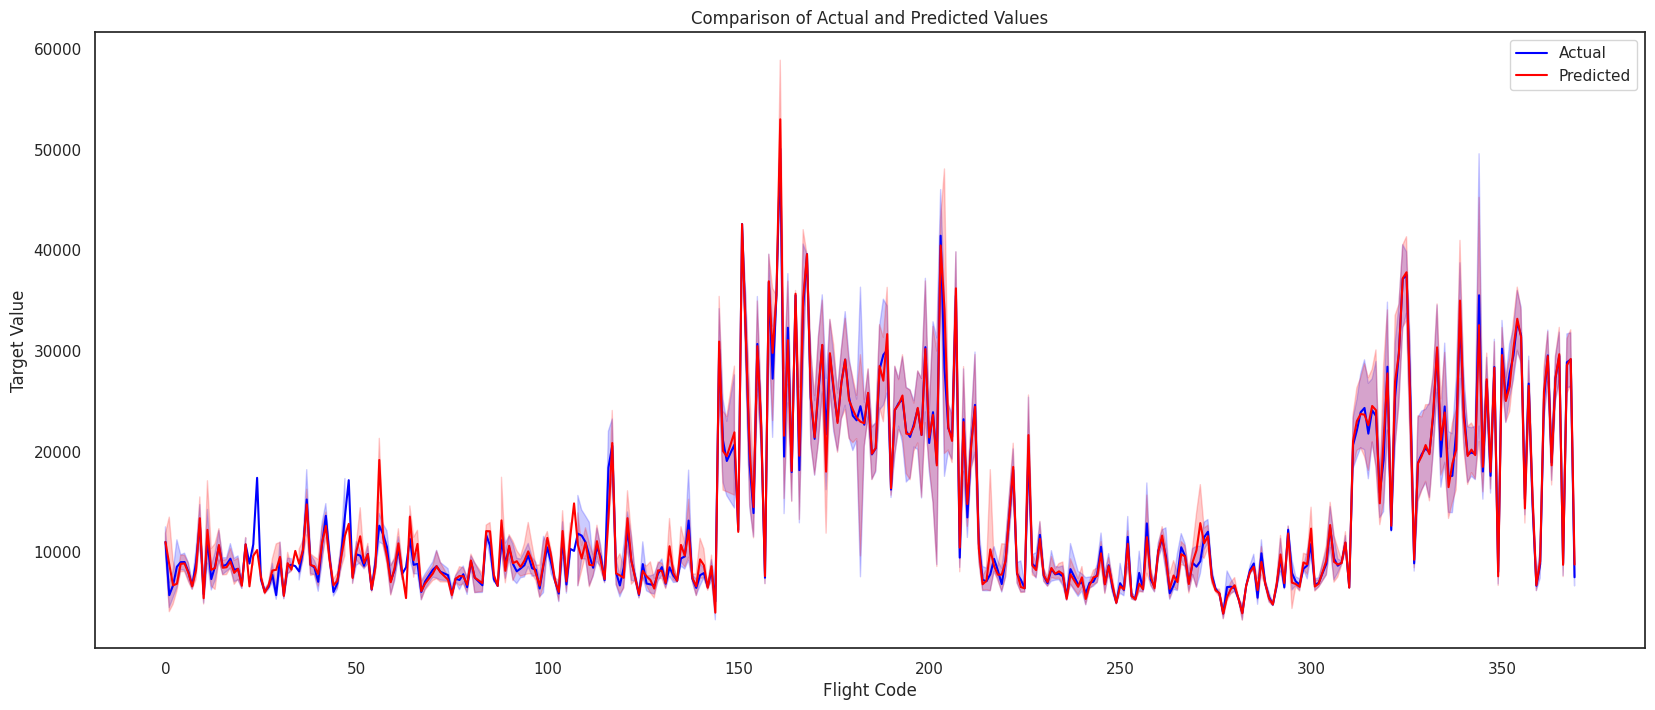

In [21]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


In [23]:
score = r2_score(y_preds, y_test)
print (score)
print(MAPE (y_test, y_preds))

models_dict['RandomForestRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9643513024493282
7.617653798095297


In [24]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

result.head(100)

,Date_of_journey,Flight_code,Duration_in_hours,Days_left,Fare,Journey_day_Friday,Journey_day_Monday,Journey_day_Saturday,Journey_day_Sunday,Journey_day_Thursday,...,Destination_Bangalore,Destination_Chennai,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,year,month,day,Price_actual,Price_pred
6,2023-01-16,196,2.2500,1.0,5955.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,5955.0,6621.41
35,2023-01-16,223,9.7500,1.0,6873.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,6873.0,9882.77
39,2023-01-16,195,13.5000,1.0,7194.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,7194.0,12947.16
54,2023-01-16,131,2.4167,1.0,7844.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,7844.0,9499.93
70,2023-01-16,327,11.6667,1.0,9331.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,9331.0,10957.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2023-01-17,332,5.5833,2.0,15510.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,15510.0,13976.35
542,2023-01-17,338,8.8333,2.0,15846.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,15846.0,17189.53
543,2023-01-17,241,4.2500,2.0,15596.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,15596.0,11417.45
548,2023-01-17,189,8.3333,2.0,17715.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,17715.0,19292.24


In [26]:
'''airline_df = result[result['Airline']==4]
airline_df = airline_df[airline_df['Class']==1]'''

"airline_df = result[result['Airline']==4]\nairline_df = airline_df[airline_df['Class']==1]"

<Figure size 2000x800 with 0 Axes>

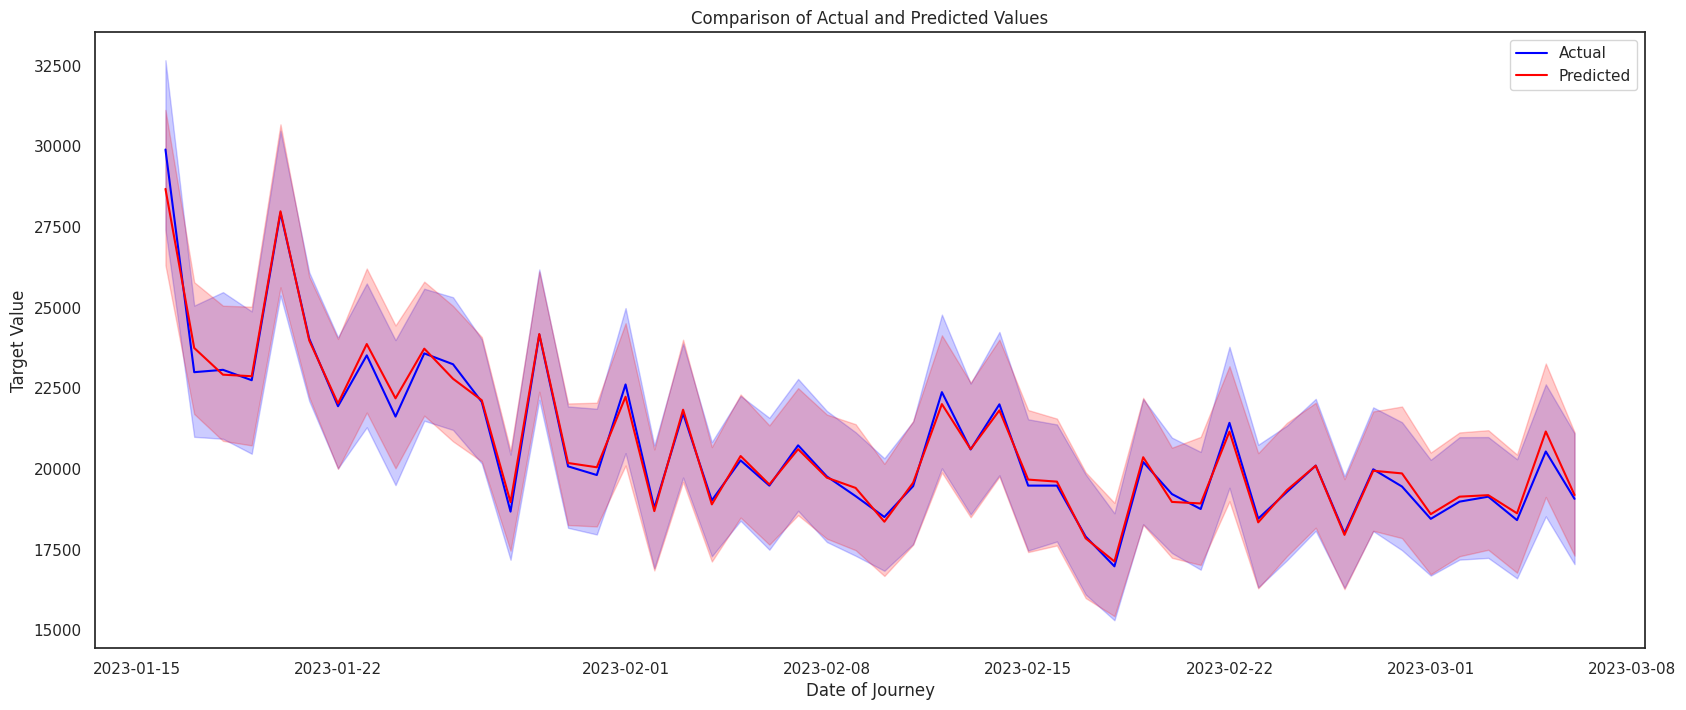

In [27]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
''''''
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [30]:
'''plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()'''

"plt.figure(figsize=(20,8))\nplt.figure(figsize=(20,8))\nsns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')\nsns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')\nplt.xlabel('Date of Journey')\nplt.ylabel('Target Value')\nplt.title('Comparison of Actual and Predicted Values')\nplt.legend()\nplt.show()"

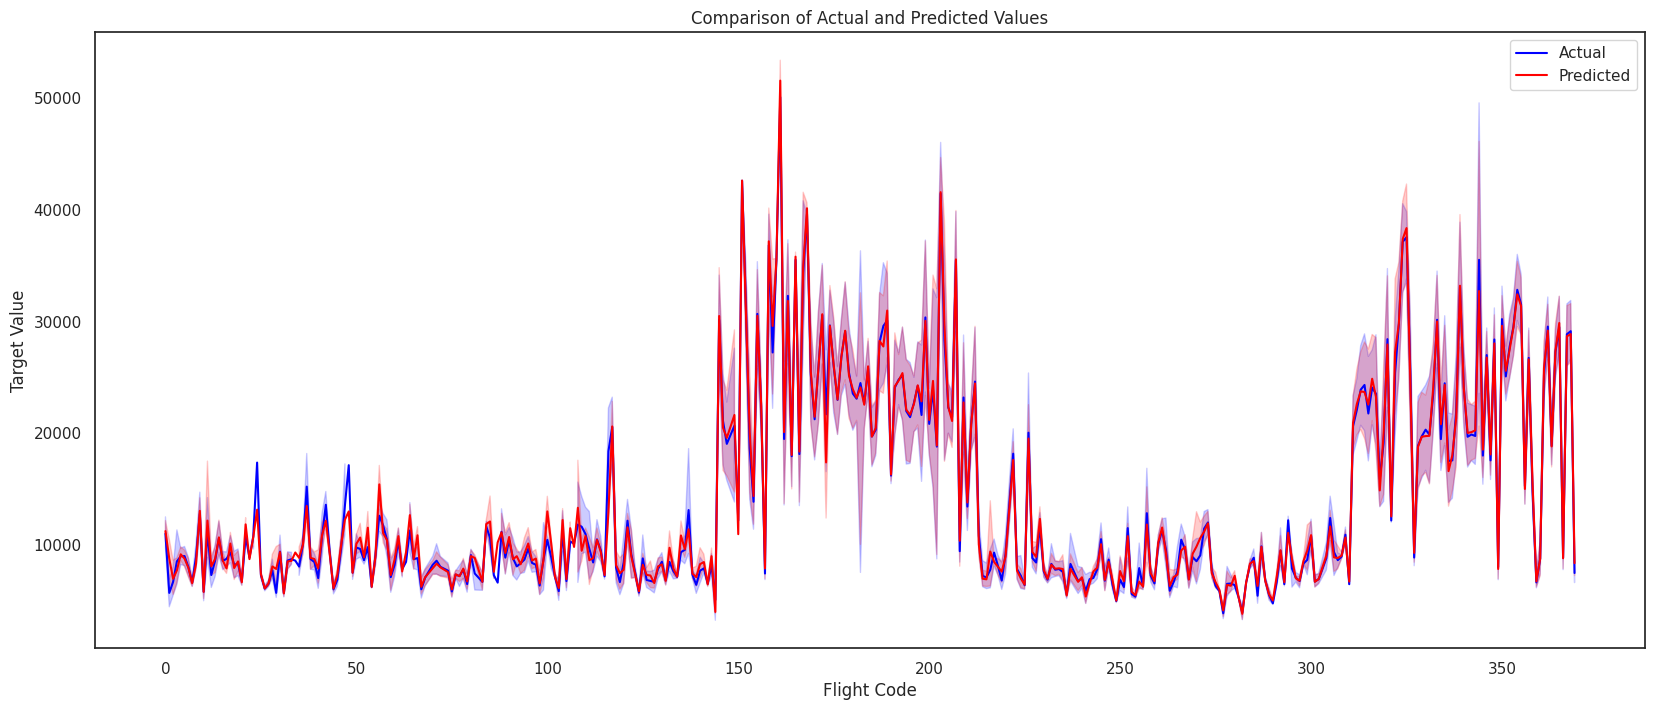

In [29]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [31]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.get_params()

model = xgb.XGBRegressor(
    booster='gbtree',
    learning_rate=0.3,
    n_estimators=200,
    max_depth=7,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_lambda=1,
    reg_alpha=0,
    objective='reg:squarederror',
    seed=42
)

In [32]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


In [33]:
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['XGBRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9727943888920311
9.189148361065405


In [34]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

result.head(100)

,Date_of_journey,Flight_code,Duration_in_hours,Days_left,Fare,Journey_day_Friday,Journey_day_Monday,Journey_day_Saturday,Journey_day_Sunday,Journey_day_Thursday,...,Destination_Bangalore,Destination_Chennai,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,year,month,day,Price_actual,Price_pred
6,2023-01-16,196,2.2500,1.0,5955.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,5955.0,7156.105469
35,2023-01-16,223,9.7500,1.0,6873.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,6873.0,11706.020508
39,2023-01-16,195,13.5000,1.0,7194.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,7194.0,12525.242188
54,2023-01-16,131,2.4167,1.0,7844.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,7844.0,10796.921875
70,2023-01-16,327,11.6667,1.0,9331.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,9331.0,12531.295898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2023-01-17,332,5.5833,2.0,15510.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,15510.0,14171.337891
542,2023-01-17,338,8.8333,2.0,15846.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,15846.0,16876.923828
543,2023-01-17,241,4.2500,2.0,15596.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,15596.0,13324.610352
548,2023-01-17,189,8.3333,2.0,17715.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,17715.0,19199.130859


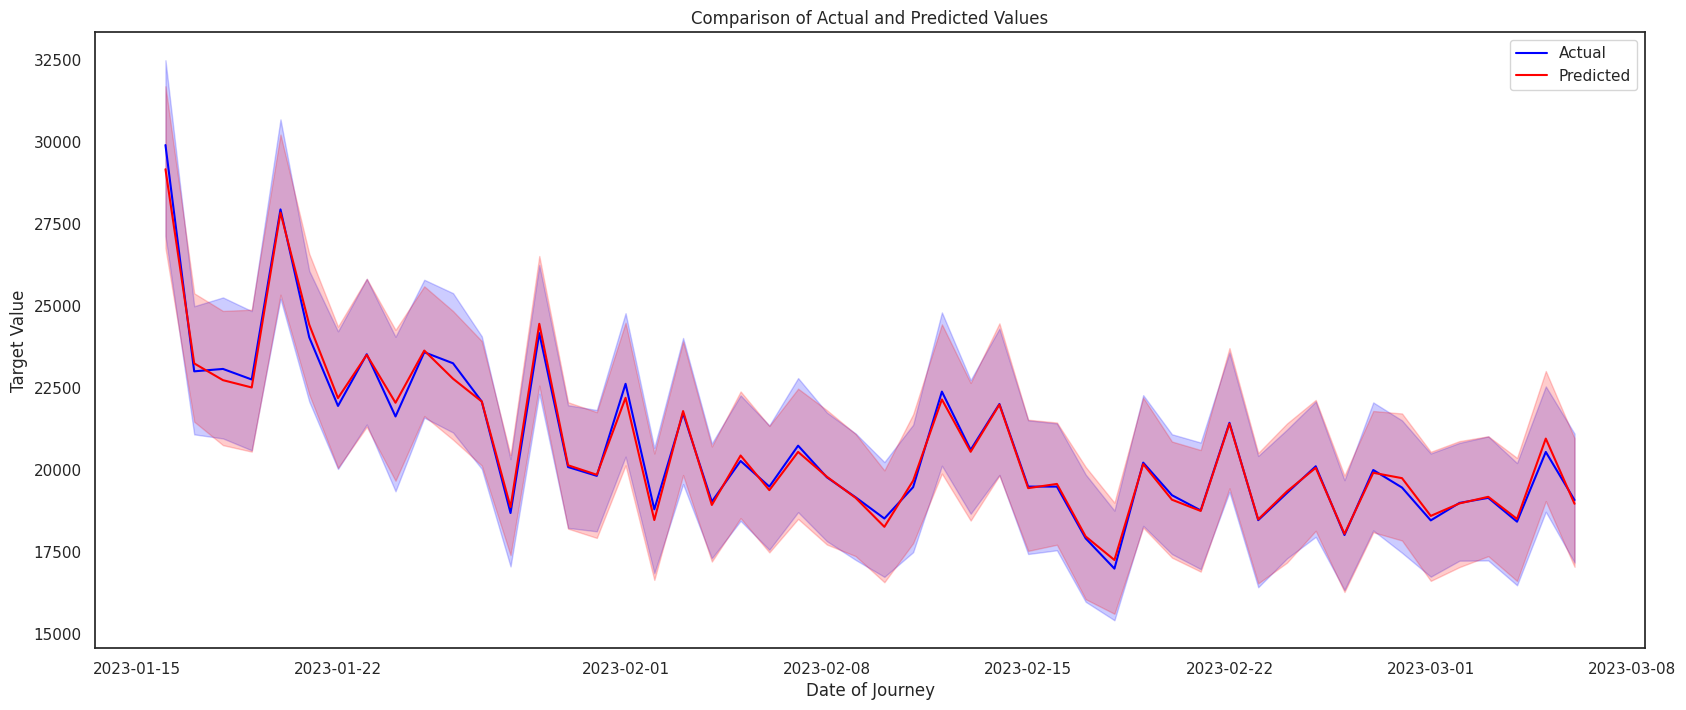

In [37]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

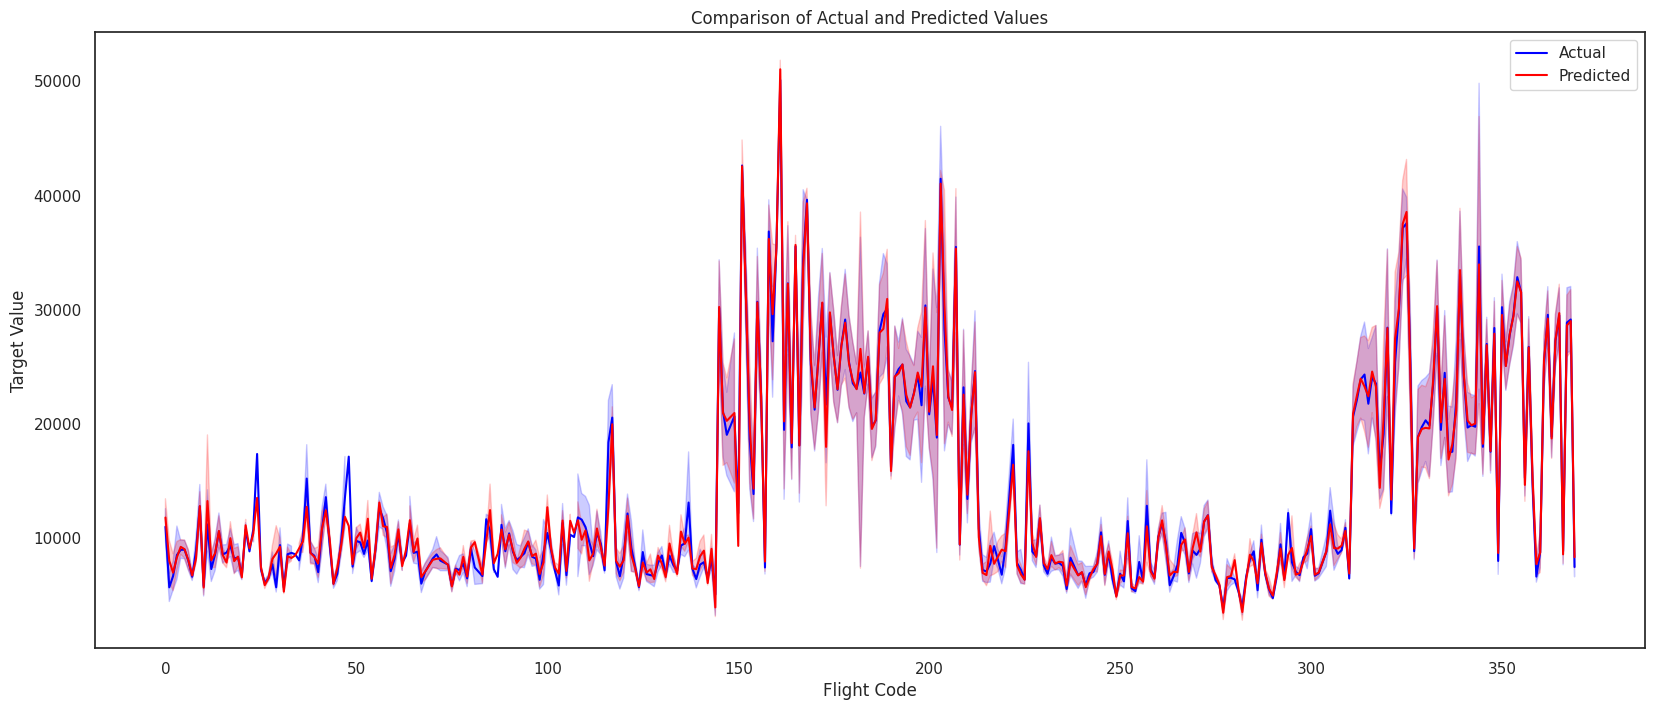

In [38]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [36]:
!pip install catboost
import catboost as cb

model = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.3,
    depth=7,
    loss_function='MAE',
    random_seed=42
)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.5 MB/s eta 0:00:00


In [39]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


0:	learn: 9091.5154794	total: 70.4ms	remaining: 1m 10s
1:	learn: 6864.1672219	total: 88.6ms	remaining: 44.2s
2:	learn: 5409.9378442	total: 103ms	remaining: 34.1s
3:	learn: 4475.7908328	total: 118ms	remaining: 29.5s
4:	learn: 3963.8772070	total: 133ms	remaining: 26.4s
5:	learn: 3530.5289560	total: 147ms	remaining: 24.3s
6:	learn: 3365.1272150	total: 161ms	remaining: 22.8s
7:	learn: 3230.6553151	total: 175ms	remaining: 21.6s
8:	learn: 3124.4388126	total: 190ms	remaining: 20.9s
9:	learn: 3041.1193151	total: 206ms	remaining: 20.3s
10:	learn: 2975.6538889	total: 219ms	remaining: 19.7s
11:	learn: 2923.9485051	total: 232ms	remaining: 19.1s
12:	learn: 2888.0110882	total: 248ms	remaining: 18.8s
13:	learn: 2856.1137360	total: 261ms	remaining: 18.4s
14:	learn: 2834.8125915	total: 278ms	remaining: 18.3s
15:	learn: 2814.4626725	total: 293ms	remaining: 18s
16:	learn: 2778.6648607	total: 306ms	remaining: 17.7s
17:	learn: 2758.8428385	total: 319ms	remaining: 17.4s
18:	learn: 2729.0977828	total: 331ms	

In [40]:
y_preds.shape
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['CatBoostRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9576526217069916
7.629530582772677


In [41]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

result.head(100)

,Date_of_journey,Flight_code,Duration_in_hours,Days_left,Fare,Journey_day_Friday,Journey_day_Monday,Journey_day_Saturday,Journey_day_Sunday,Journey_day_Thursday,...,Destination_Bangalore,Destination_Chennai,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,year,month,day,Price_actual,Price_pred
6,2023-01-16,196,2.2500,1.0,5955.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,5955.0,7074.434446
35,2023-01-16,223,9.7500,1.0,6873.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,6873.0,8931.368418
39,2023-01-16,195,13.5000,1.0,7194.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,7194.0,10321.991053
54,2023-01-16,131,2.4167,1.0,7844.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,7844.0,11548.987229
70,2023-01-16,327,11.6667,1.0,9331.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,9331.0,13241.735626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2023-01-17,332,5.5833,2.0,15510.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,15510.0,13318.313937
542,2023-01-17,338,8.8333,2.0,15846.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,15846.0,15845.289760
543,2023-01-17,241,4.2500,2.0,15596.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,15596.0,13965.032847
548,2023-01-17,189,8.3333,2.0,17715.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,17715.0,17667.702477


<Figure size 2000x800 with 0 Axes>

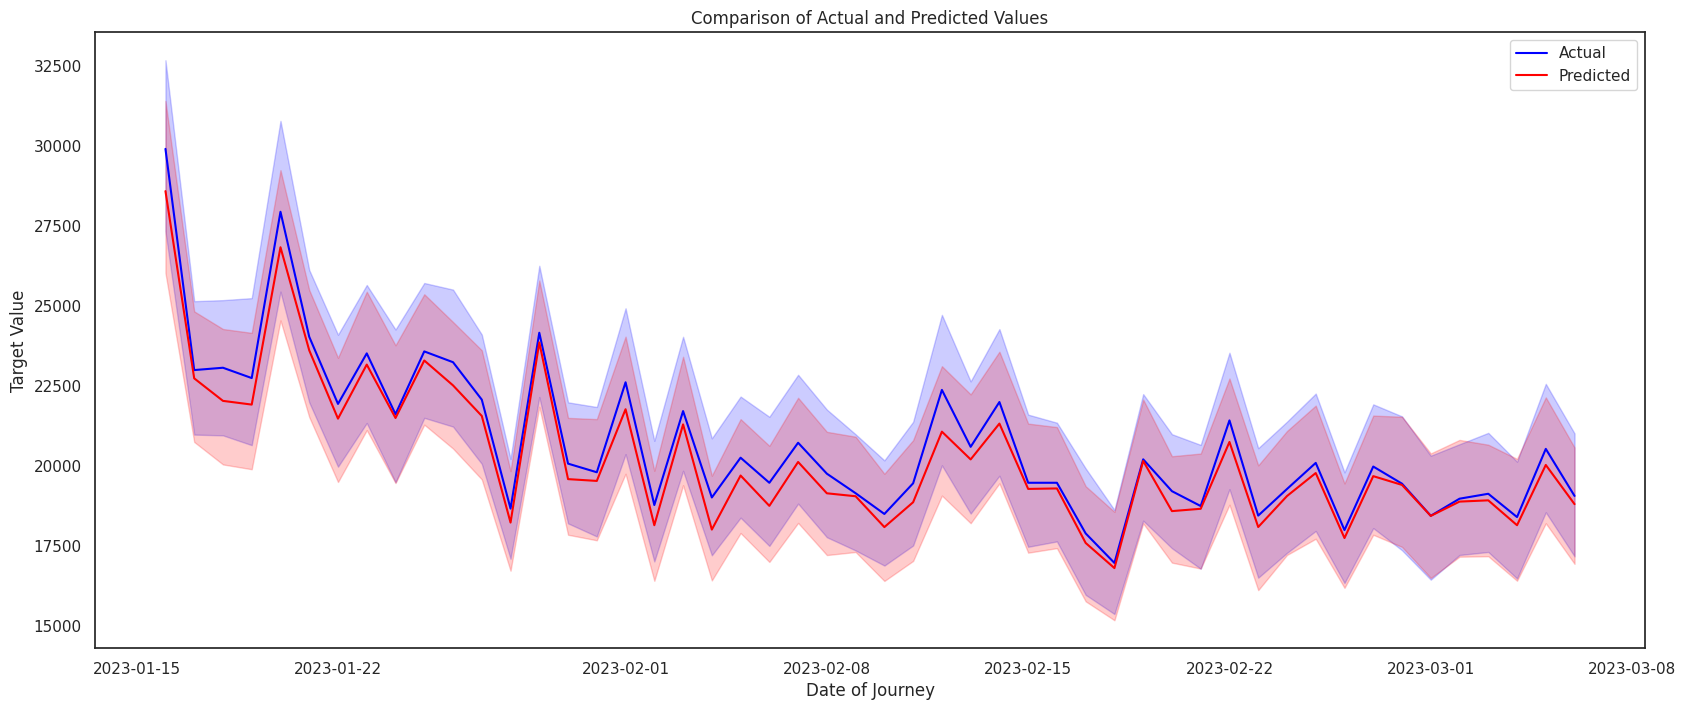

In [42]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

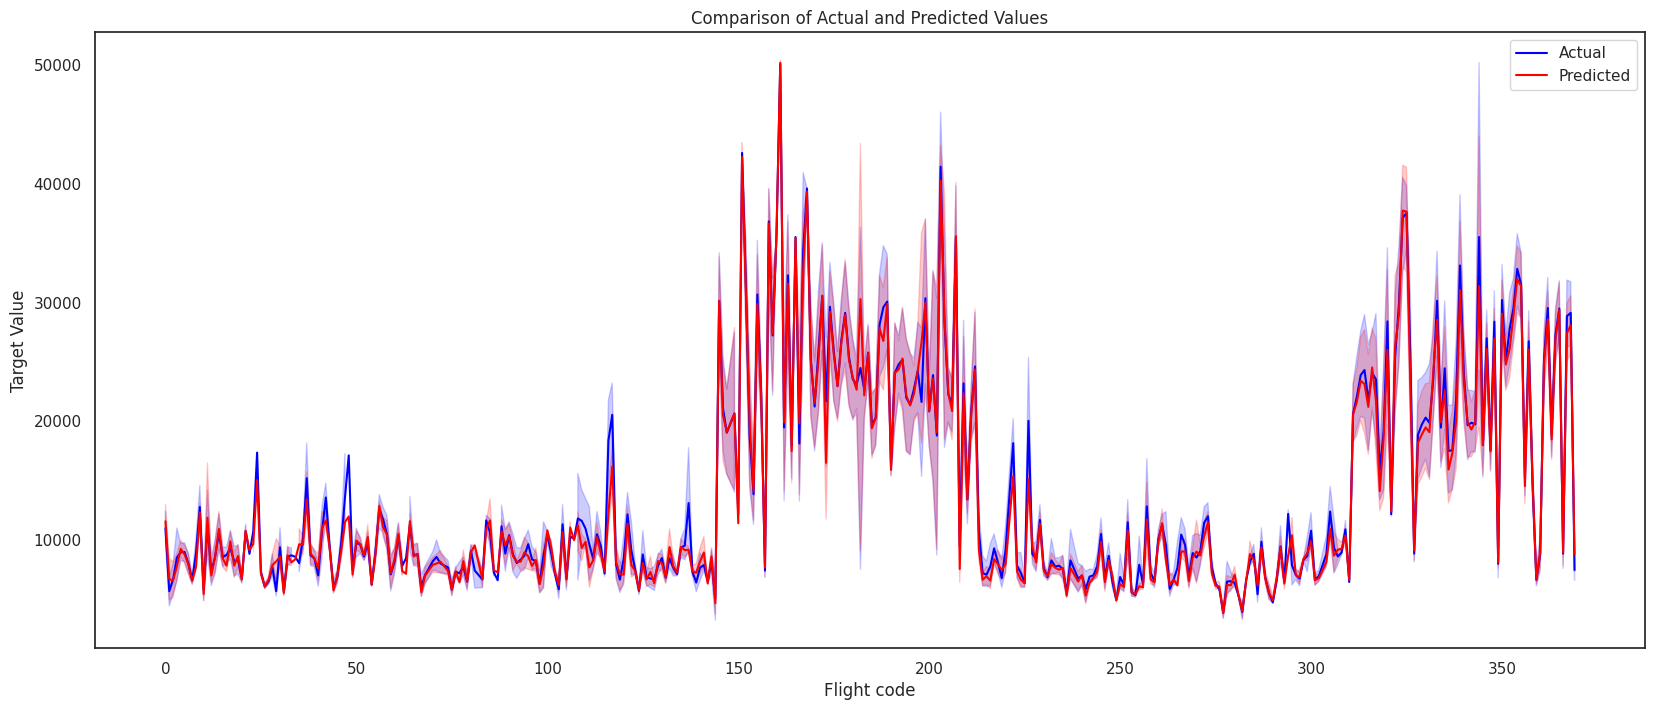

In [43]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [44]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [45]:
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['BaggingRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9642533504339941
7.622316608686143


In [46]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

result.head(100)

,Date_of_journey,Flight_code,Duration_in_hours,Days_left,Fare,Journey_day_Friday,Journey_day_Monday,Journey_day_Saturday,Journey_day_Sunday,Journey_day_Thursday,...,Destination_Bangalore,Destination_Chennai,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,year,month,day,Price_actual,Price_pred
6,2023-01-16,196,2.2500,1.0,5955.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,5955.0,6782.66
35,2023-01-16,223,9.7500,1.0,6873.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,6873.0,9790.05
39,2023-01-16,195,13.5000,1.0,7194.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,7194.0,12978.48
54,2023-01-16,131,2.4167,1.0,7844.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,7844.0,9512.21
70,2023-01-16,327,11.6667,1.0,9331.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,16,9331.0,10968.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2023-01-17,332,5.5833,2.0,15510.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,15510.0,14031.88
542,2023-01-17,338,8.8333,2.0,15846.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,15846.0,17375.14
543,2023-01-17,241,4.2500,2.0,15596.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,15596.0,11820.09
548,2023-01-17,189,8.3333,2.0,17715.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2023,1,17,17715.0,19266.16


In [48]:
'''#make a df where Airline is 0 and Class is 1
airline_df = result[result['Airline']==0]
airline_df = airline_df[airline_df['Class']==1]
'''

"#make a df where Airline is 0 and Class is 1\nairline_df = result[result['Airline']==0]\nairline_df = airline_df[airline_df['Class']==1]\n"

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

<Figure size 2000x800 with 0 Axes>

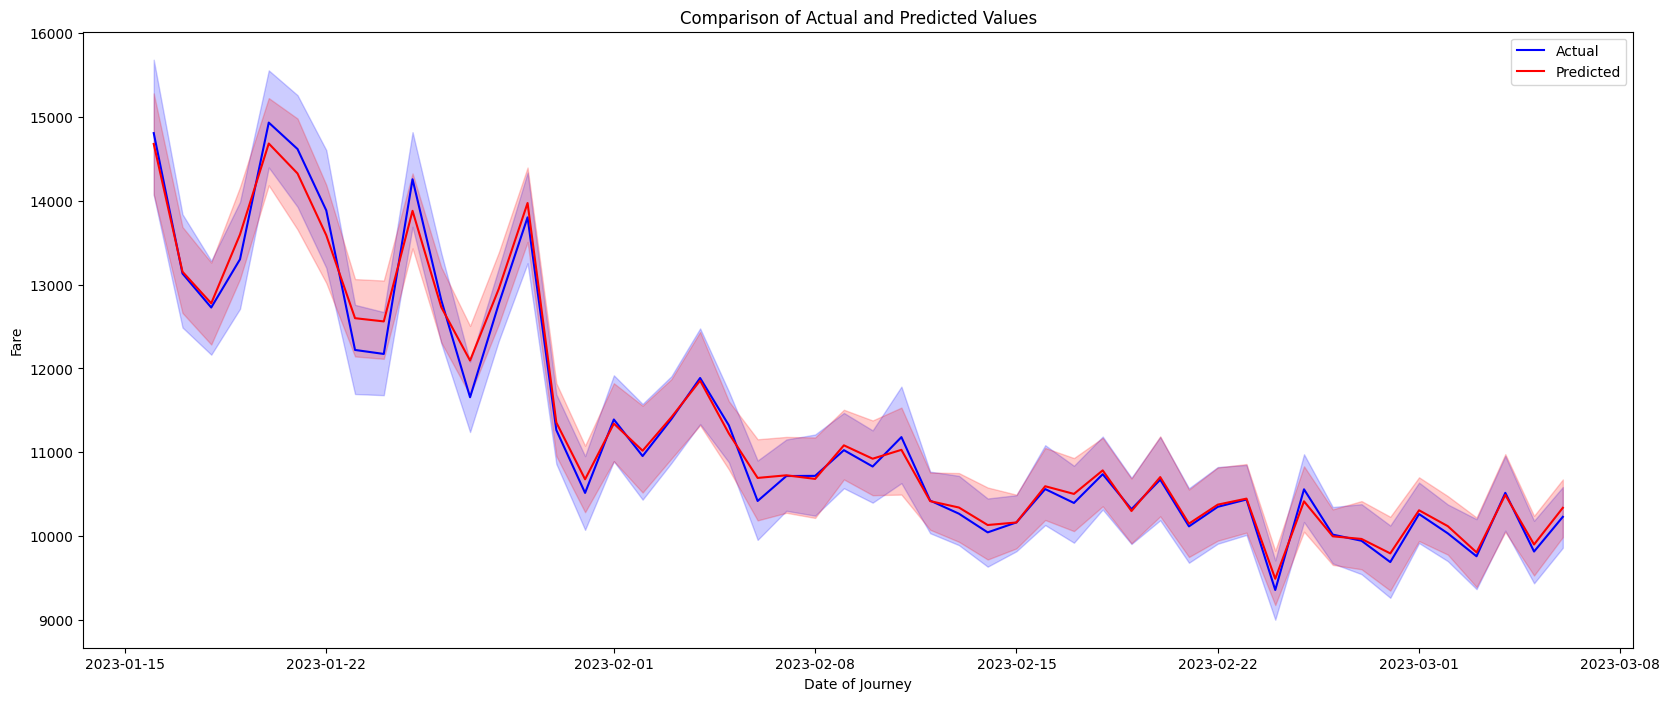

In [ ]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Fare')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [ ]:
'''plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()'''

"plt.figure(figsize=(20,8))\nplt.figure(figsize=(20,8))\nsns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')\nsns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')\nplt.xlabel('Date of Journey')\nplt.ylabel('Target Value')\nplt.title('Comparison of Actual and Predicted Values')\nplt.legend()\nplt.show()"

In [49]:
model = "LSTMModel((lstm): LSTM(13, 50, num_layers=4, batch_first=True), (fc): Linear(in_features=50, out_features=1, bias=True))"

R2_Score = 0.8519364959859111

MAPE = 23.626225

RMSE = 4997.5527

#models_dict['LSTM'] = (model, R2_Score, MAPE, RMSE)

In [50]:
models_df = pd.DataFrame(models_dict).T
models_df.columns = ['Model','R2 Score', 'MAPE', 'RMSE']


In [51]:
models_df

,Model,R2 Score,MAPE,RMSE
DecisionTreeRegressor,DecisionTreeRegressor(random_state=42),0.939092,8.792497,4574.818336
RandomForestRegressor,"(DecisionTreeRegressor(max_features=1.0, rando...",0.964351,7.617654,3425.820709
XGBRegressor,"XGBRegressor(base_score=None, booster='gbtree'...",0.972794,9.189148,2997.150934
CatBoostRegressor,<catboost.core.CatBoostRegressor object at 0x7...,0.957653,7.629531,3645.354378
BaggingRegressor,(DecisionTreeRegressor(random_state=1952926171...,0.964253,7.622317,3430.071068
